In this project we will be doing exploratory data analysis of data obtained from an app.We will also make a recommender system based on which company can try to convert sustomers from free to paid users.In this kernel we will cover topics like Plotting,Data Maniplation,Classification models,K-Fold Cross Validation,Grid Search and Feature Selection.This kernel is a work in process.If you like my work please vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/appdata10/appdata10.csv
/kaggle/input/appdata10/top_screens.csv


**Exploring the data**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

In [3]:
df=pd.read_csv('../input/appdata10/appdata10.csv')
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


Dataset has information on the customer when they started using the app and when they enrolled for paid service.0 is Sunday and 6 is Saturday.Screen List is the detail of different screens opened by the customer.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0


We can conclude from the describe that there are 50000 users.Mean of day of week is 6 is as expected as days are counted from 0 to 6.Mean age of the users is 32.Number of screens used is around 21.Minigame is used by 10 % of the users.Premium feature is used by 17% of the users.62% of the customers have enrolled into the pay and use.16 % of users have liked a feature.

**Cleaning the data**

In [5]:
df['hour']=df.hour.str.slice(1,3).astype(int)

In [6]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


We have replaced the hour column from string to Numerical values

**Plotting histograms**

In [7]:
df1=df.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

In [8]:
df1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


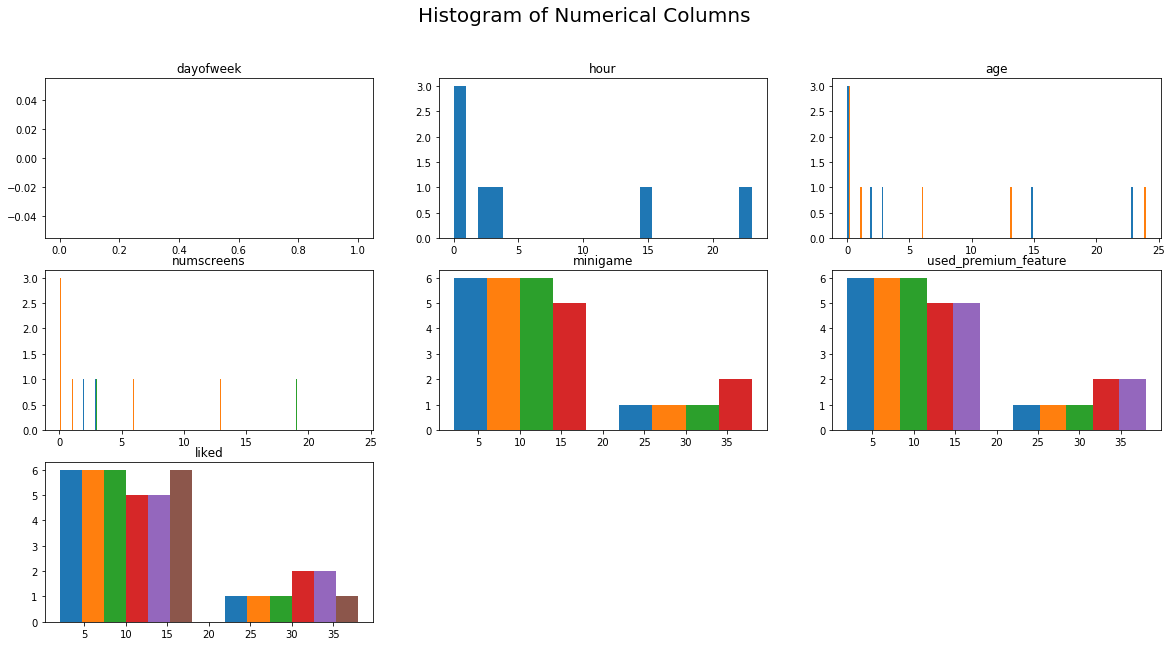

In [9]:
plt.figure(figsize=(20,10))
plt.suptitle('Histogram of Numerical Columns',fontsize=20)
for i in range(1,df1.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df1.columns.values[i-1])
    vals=np.size(df1.iloc[:,i-1].unique())
    plt.hist(df1.iloc[:i-1],bins=vals)
    

In [10]:
df1.shape[1]

7

**Correlation Plot**

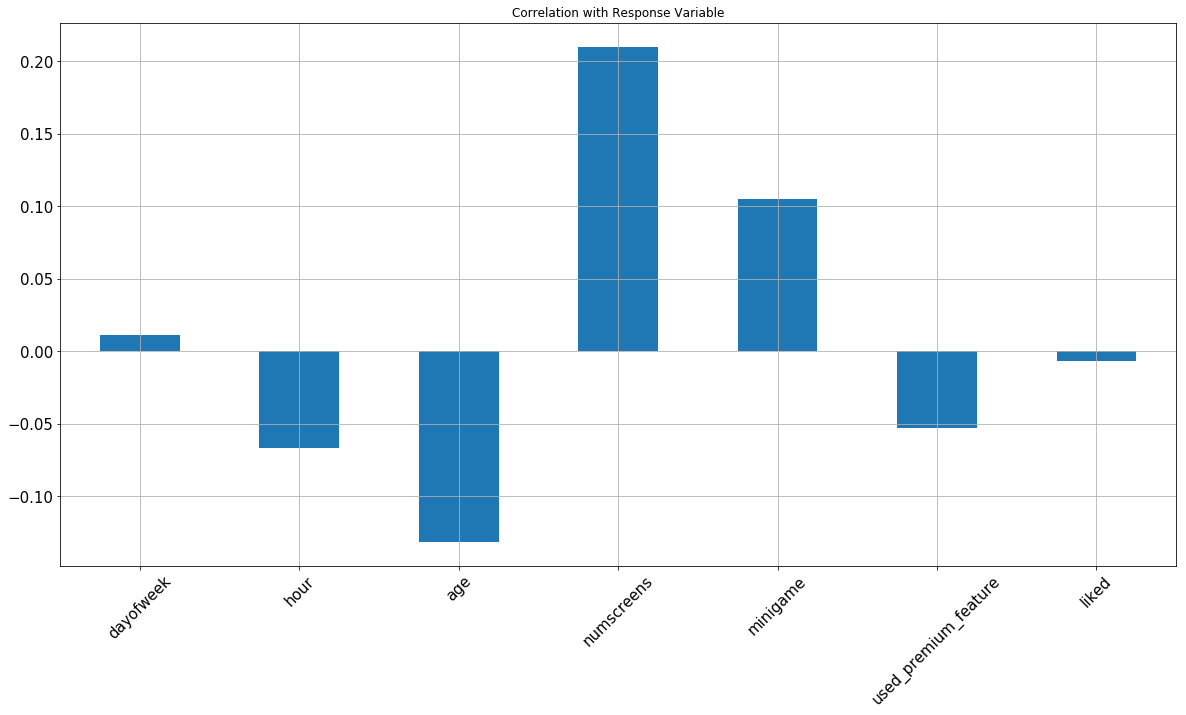

In [11]:
df1.corrwith(df.enrolled).plot.bar(figsize=(20,10),title='Correlation with Response Variable',fontsize=15,rot=45,grid=True)
plt.ioff()

We can see that the day of the week has very small correlation to enrollement.
Hour has negative correlation that mean earlier the time of login more the chance of enrollement.
Age has negtive correlation which means younger people are more likely to enroll for paid usage.
More number of screens browsed more is change of enrollement.
People who played minigame on the app have high chance of enrollement.
People who use premium feature have less chance of enrolling.
Even Like has a small negative correlation with enrollement.

**Correlation Matrix**

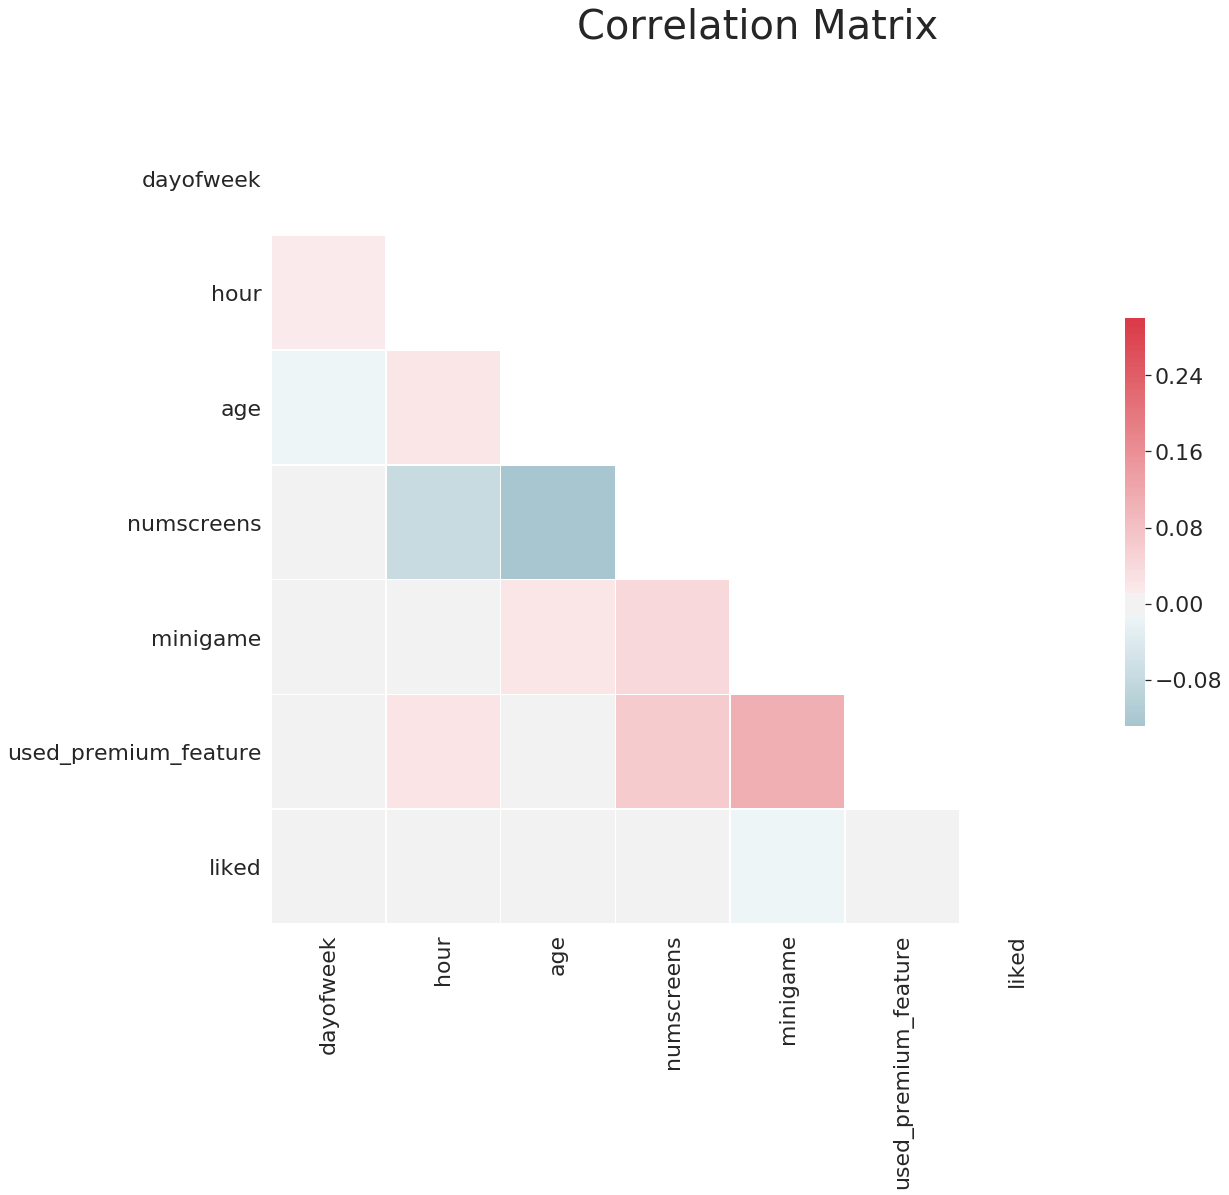

In [12]:
#Set up plot style
sns.set(style='white',font_scale=2)

#Compute Correlation Matrix
corr=df1.corr()

#Generate mask for upper traingle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#Set up the matplotlib figure
f,ax=plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix",fontsize=40)

#Generate a custom diverging Colormap 
cmap=sns.diverging_palette(220,10,as_cmap=True)

#Draw the heat map with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=0.5,cbar_kws={'shrink':.5})
plt.ioff()

We can see that age and num of screen as negatively correlated as age increase people will browse less.
Also negative correlation between day of the hour and num os screen means people browse screens more at nigh early morning.
Mini game and Premium faeature are highly correlated 

**Feature Engineering-Response **

In [13]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

**Convert data to datetime object**

In [14]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [15]:
df['first_open']=[parser.parse(row_data) for row_data in df['first_open']]


In [16]:
df['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in df['enrolled_date']]

There are sum NaN values in the enrolled date column.So we update the code to consider the NaN Values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null int64
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null datetime64[ns]
liked                   50000 non-null int64
dtypes: datetime64[ns](2), int64(9), object(1)
memory usage: 4.6+ MB


In [18]:
df['Difference']=(df.enrolled_date-df.first_open).astype('timedelta64[h]')

In [19]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


**Finding out the best time for enrollement from open date**

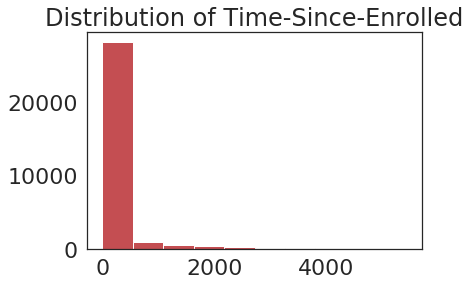

In [20]:
plt.hist(df['Difference'].dropna(),color='r')
plt.title('Distribution of Time-Since-Enrolled')
plt.ioff()

We see that most enrollements happen within 100 hours.

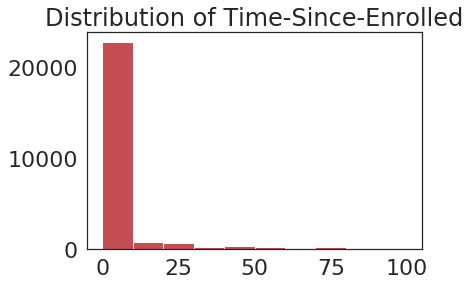

In [21]:
plt.hist(df['Difference'].dropna(),color='r',range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')
plt.ioff()

We can see that most of the enrollements happen within 25 hours.For our analysis we will consider 2 days from opening that will be equaivalent to 48 hours.So we will remove all the people who have not enrolled and have been using the app for more than 48 hours.

In [22]:
df.shape

(50000, 13)

In [23]:
df.loc[df.Difference>48,'enrolled']=0

In [24]:
df=df.drop(columns=['Difference','enrolled_date','first_open'])

**Feature enginnering Screens**

In [25]:
top_screens=pd.read_csv('../input/appdata10/top_screens.csv')
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [26]:
top_screens=top_screens.top_screens.values

In [27]:
for sc in top_screens:
    df[sc]=df.screen_list.str.contains(sc).astype(int)
    df['screen_list']=df.screen_list.str.replace(sc+",","")

In [28]:
df['Other']=df.screen_list.str.count(",")
df=df.drop(columns=['screen_list'])

In [29]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,9


In [30]:
savings_screens=['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
df['SavingsCount']=df[savings_screens].sum(axis=1)

In [31]:
df=df.drop(columns=savings_screens)

In [32]:
cm_screens=['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']

In [33]:
df['CMCOunt']=df[cm_screens].sum(axis=1)
df=df.drop(columns=cm_screens)

In [34]:
loan_screens=['Loan','Loan2','Loan3','Loan4']

In [35]:
df['LoansCount']=df[loan_screens].sum(axis=1)
df=df.drop(columns=loan_screens)

In [36]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'CC1Category', 'Splash', 'CC1',
       'RewardsContainer', 'EditProfile', 'Finances', 'CC3', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCOunt', 'LoansCount'],
      dtype='object')

In [37]:
df.to_csv('new_appdata10.csv',index=False)

**Data Preprocessing**

In [38]:
response=df['enrolled']

In [39]:
df=df.drop(columns='enrolled')

**Splitting data into Test Train **

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,response,test_size=0.2,random_state=0)

In [41]:
train_identifier=X_train['user']
X_train=X_train.drop(columns='user')
test_identifier=X_test['user']
X_test=X_test.drop(columns='user')

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))
X_train2.columns=X_test.columns.values
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values
X_train=X_train2
X_test=X_test2

**Model Built**

In [43]:
from sklearn.linear_model import LogisticRegression 
classifier=LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred=classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[3877, 1195],
       [1142, 3786]])

In [46]:
accuracy_score=(y_test,y_pred)

In [47]:
precision_score=(y_test,y_pred)

In [48]:
recall_score(y_test,y_pred)

0.768262987012987

In [49]:
f1_score(y_test,y_pred)

0.7641537995761428

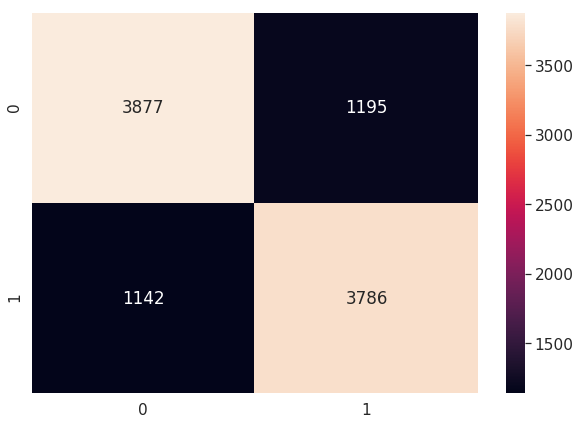

In [50]:
df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt='g')
#print('Test Data Accuracy:%0.4f' % accuracy_score(y_test,y_pred))
plt.ioff()

In [51]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print('Logistic Accuracy:%0.3f (+/- %0.3f)' % (accuracies.mean(),accuracies.std()*2))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Accuracy:0.765 (+/- 0.009)


In [52]:
final_results=pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results']=y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


From this data we can identify the people who have not yet enrolled into the app.Based on this information we can do targetted advertising to get more people to enroll into paid usage